# Regression Workbook
Welcome to our Regression notebook. Today we will learn Basic and Regularized Regression.

## 1. Linear Regression
First let's start with importing libraries as usual.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

Let's create a sine wave.

In [2]:
x = np.linspace(0, 2*np.pi, 100)

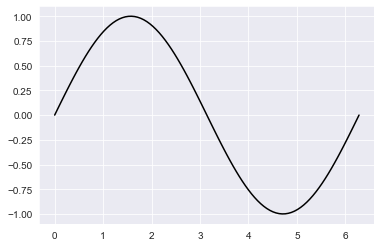

In [3]:
plt.plot(x, np.sin(x),'k')

Now let's add some noise to the sine wave.

In [4]:
# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

In [5]:
# target variable
y = np.sin(x) + noise

In [6]:
# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


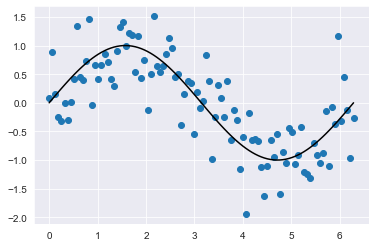

In [7]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, np.sin(df.x), color='k', label='Sine wave')

plt.show()

Let's save this as a new dataframe.

### 1.1 Mean model

Mean model is the most basic prediction model.

In [8]:
# Build model
pred = np.mean(df.y)

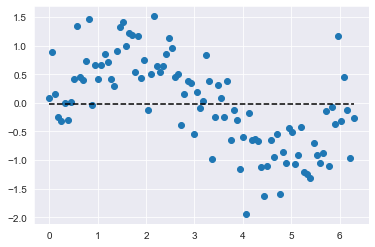

In [9]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay horizontal line for the prediction
plt.plot(df.x, [pred]*len(df.x), 'k--' )
plt.show()

What do you think about the mean model?

### 1.2 Linear Regression Model

With linear regression, we are simply trying to fit the following formula: y = w0x0 + c

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Initialize instance of linear regression
linear_reg_model = LinearRegression()

In [12]:
# Separate our input features and target variable
features = df.drop('y', axis=1)
target = df.y

In [13]:
# Fit model to the data
linear_reg_model.fit(features, target)

LinearRegression()

In [14]:
print(linear_reg_model.intercept_)
print(linear_reg_model.coef_)

0.8238675120273313
[-0.26773758]


Let's see what these values are on the plot!

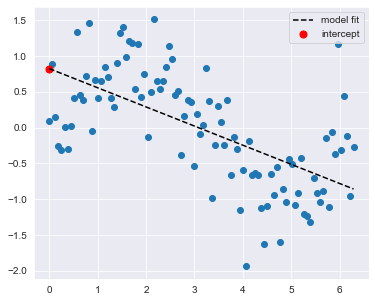

In [15]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, linear_reg_model.predict(features), 'k--', label='model fit')
ax.scatter(0,linear_reg_model.intercept_, s=50, c='r', label='intercept')

ax.legend(loc=1)
plt.show()

In [16]:
print(linear_reg_model.intercept_ + 5*linear_reg_model.coef_)

[-0.51482041]


In [17]:
print(linear_reg_model.predict(np.zeros([1,1])+5))

[-0.51482041]


## 2. Polynomial Regression

With polynomial regression, we are simply trying to fit the following formula: y = wx + wx^2 + c

In [18]:
# Make a copy of df
df_poly = df.copy()

In [19]:
# Create the x^2 input feature
df_poly['x^2'] = np.power(df_poly.x, 2)

In [20]:
df_poly.head()

,x,y,x^2
0,0.000000,0.086260,0.000000
1,0.063467,0.881165,0.004028
2,0.126933,0.145261,0.016112
3,0.190400,-0.252824,0.036252
4,0.253866,-0.320448,0.064448


In [21]:
linear_model = LinearRegression()

features = df_poly.drop('y', axis=1)
target = df_poly.y

linear_model.fit(features, target)

LinearRegression()

In [22]:
target

0     0.086260
1     0.881165
2     0.145261
3    -0.252824
4    -0.320448
        ...   
95   -0.312249
96    0.443255
97   -0.122903
98   -0.961879
99   -0.268629
Name: y, Length: 100, dtype: float64

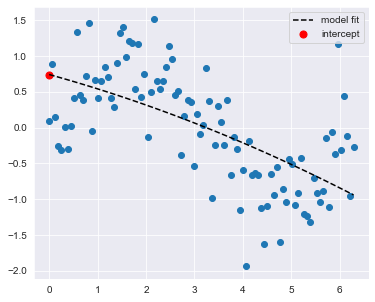

In [23]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_poly.x, df_poly.y)
# Plot predicted values of y
ax.plot(df_poly.x, linear_model.predict(features), 'k--', label='model fit')
ax.scatter(0,linear_model.intercept_, s=50, c='r', label='intercept')

ax.legend(loc=1)
plt.show()

### Higher order polynomials 
Well that was a bit disappointing. Let's see how we can predict these curves in the data.

In [24]:
third_order_df = df.copy()

In [25]:
third_order_df['x^2'] = np.power(third_order_df.x, 2)

In [26]:
third_order_df['x^3'] = np.power(third_order_df.x, 3)

In [27]:
third_order_df.head()

,x,y,x^2,x^3
0,0.000000,0.086260,0.000000,0.000000
1,0.063467,0.881165,0.004028,0.000256
2,0.126933,0.145261,0.016112,0.002045
3,0.190400,-0.252824,0.036252,0.006902
4,0.253866,-0.320448,0.064448,0.016361


In [28]:
features = third_order_df.drop('y', axis=1)
target = third_order_df.y

In [29]:
features

,x,x^2,x^3
0,0.000000,0.000000,0.000000
1,0.063467,0.004028,0.000256
2,0.126933,0.016112,0.002045
3,0.190400,0.036252,0.006902
4,0.253866,0.064448,0.016361
...,...,...,...
95,6.029319,36.352690,219.181976
96,6.092786,37.122038,226.176626
97,6.156252,37.899442,233.318526
98,6.219719,38.684902,240.609211


In [30]:
third_order_model = LinearRegression()

In [31]:
third_order_model.fit(features, target)

LinearRegression()

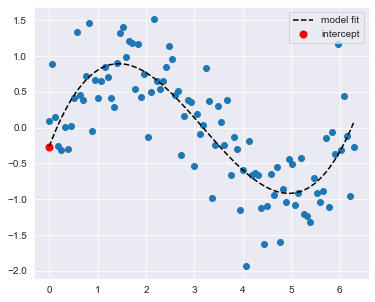

In [32]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_poly.x, df_poly.y)
# Plot predicted values of y
ax.plot(third_order_df.x, third_order_model.predict(features), 'k--', label='model fit')
ax.scatter(0,third_order_model.intercept_, s=50, c='r', label='intercept')

ax.legend(loc=1)
plt.show()

How do we make it so that we don't have to increase the lines of code we write exponentially as we increase the order?

## 3. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# Logistic regression
model = LogisticRegression()

In [35]:
target

0     0.086260
1     0.881165
2     0.145261
3    -0.252824
4    -0.320448
        ...   
95   -0.312249
96    0.443255
97   -0.122903
98   -0.961879
99   -0.268629
Name: y, Length: 100, dtype: float64

In [36]:
model.fit(features, target)

ValueError: Unknown label type: 'continuous'

In [37]:
print(target)

0     0.086260
1     0.881165
2     0.145261
3    -0.252824
4    -0.320448
        ...   
95   -0.312249
96    0.443255
97   -0.122903
98   -0.961879
99   -0.268629
Name: y, Length: 100, dtype: float64


What does this error mean?

In [38]:
print(target)

0     0.086260
1     0.881165
2     0.145261
3    -0.252824
4    -0.320448
        ...   
95   -0.312249
96    0.443255
97   -0.122903
98   -0.961879
99   -0.268629
Name: y, Length: 100, dtype: float64


In [39]:
target_categorical = np.zeros(len(target))

In [40]:
for i in range(len(target)):
    if (target[i] <=0.):
        target_categorical[i] = 0
    else:
        target_categorical[i] = 1

In [41]:
print(target_categorical, target_categorical.dtype)

[1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0.] float64


In [42]:
target_categorical = target_categorical.astype(int)

In [43]:
print(target_categorical, target_categorical.dtype)

[1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0] int64


In [44]:
model.fit(features, target_categorical)

LogisticRegression()

In [45]:
# predict()
model.predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# # predict_proba()
model.predict_proba(features[:10])

array([[0.15195352, 0.84804648],
       [0.14040579, 0.85959421],
       [0.13045881, 0.86954119],
       [0.12191011, 0.87808989],
       [0.11458442, 0.88541558],
       [0.10833136, 0.89166864],
       [0.10302282, 0.89697718],
       [0.09855037, 0.90144963],
       [0.09482285, 0.90517715],
       [0.09176414, 0.90823586]])

In [47]:
df.x

0     0.000000
1     0.063467
2     0.126933
3     0.190400
4     0.253866
        ...   
95    6.029319
96    6.092786
97    6.156252
98    6.219719
99    6.283185
Name: x, Length: 100, dtype: float64

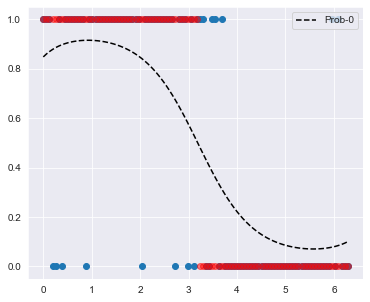

In [48]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_poly.x, target_categorical)
ax.scatter(df_poly.x, model.predict(features), color='r', alpha=0.5)
# Plot predicted values of y
ax.plot(third_order_df.x, model.predict_proba(features)[:,1], 'k--', label='Prob-0')

ax.legend(loc=1)
plt.show()

How does Logistic Regression learn?

In [49]:
model2 = LogisticRegression(C=5)

In [50]:
LogisticRegression?

In [51]:
model2.fit(features, target_categorical)

LogisticRegression(C=5)

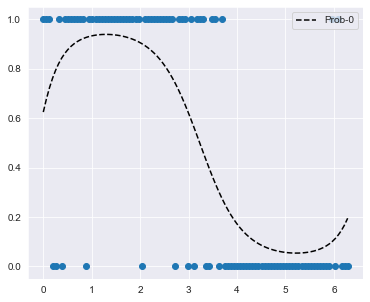

In [52]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_poly.x, target_categorical)
# Plot predicted values of y
ax.plot(third_order_df.x, model2.predict_proba(features)[:,1], 'k--', label='Prob-0')

ax.legend(loc=1)
plt.show()

In [53]:
model3 = LogisticRegression(C=0.25)

In [54]:
model3.fit(features, target_categorical)

LogisticRegression(C=0.25)

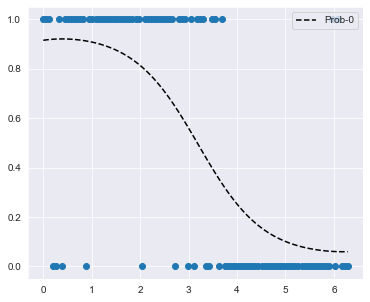

In [55]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_poly.x, target_categorical)
# Plot predicted values of y
ax.plot(third_order_df.x, model3.predict_proba(features)[:,1], 'k--', label='Prob-0')

ax.legend(loc=1)
plt.show()

This is how the logistic regression behaves with different penalties, (values of C). Is there other penalty types?

In [56]:
model4 = LogisticRegression(penalty='l2', C=0.25)

In [57]:
model4.fit(features, target_categorical)

LogisticRegression(C=0.25)

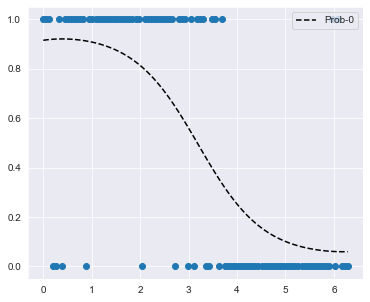

In [58]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_poly.x, target_categorical)
# Plot predicted values of y
ax.plot(third_order_df.x, model4.predict_proba(features)[:,1], 'k--', label='Prob-0')

ax.legend(loc=1)
plt.show()

## 4. Regularized Regression

Let's start with a similar dataframe, but with more parameters.

In [59]:
# input feature
x = np.linspace(0, 2*np.pi, 100)

# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

# target variable
y = np.sin(x) + noise

# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


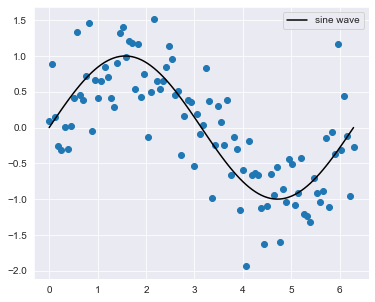

In [60]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
ax.plot(df.x, np.sin(df.x), color='k', label='sine wave')

ax.legend(loc=1)
plt.show()

In [61]:
df_sample = df.copy()

# Set seed for reproducible results
np.random.seed(555)

# Create 100 randomfeatures
for n in range(100):
    df_sample['s{}'.format(n)] = np.random.uniform(0, 2*np.pi, 100)

/var/folders/d0/xtw4cvdd52nfnnxn7pz_jdfw0000gn/T/ipykernel_85760/2307497470.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sample['s{}'.format(n)] = np.random.uniform(0, 2*np.pi, 100)


In [62]:
df_sample.head()

,x,y,s0,s1,s2,s3,s4,s5,s6,s7,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,0.000000,0.086260,4.510285,4.243360,5.077364,5.775407,0.870371,1.042189,3.288845,1.005865,...,0.401207,2.986740,3.419816,2.210869,4.116052,5.651802,2.931066,1.542499,2.299154,2.986066
1,0.063467,0.881165,0.300683,2.204225,0.492213,5.097731,0.541594,0.343164,4.840217,4.343630,...,2.432486,1.130922,0.067541,2.857747,5.934834,5.213061,5.579050,4.092146,4.464422,5.644063
2,0.126933,0.145261,5.934292,4.499745,5.629712,0.721088,4.499597,1.054771,3.207139,2.356321,...,3.335856,5.061090,0.854903,1.861820,0.216191,4.707951,1.171044,3.402163,5.652485,1.765618
3,0.190400,-0.252824,4.312653,1.798761,6.126937,0.804294,4.019667,5.314475,3.989411,2.739722,...,0.430104,3.887071,0.294676,0.168721,4.298122,5.752676,5.008056,3.983089,5.742110,1.424242
4,0.253866,-0.320448,3.651833,4.475723,5.188299,3.456177,3.971505,1.095373,6.279545,1.951886,...,6.061850,5.710574,1.732244,4.721764,4.733892,5.386840,1.901648,3.090707,1.974244,4.010548


In [63]:
X_sample = df_sample.drop('y', axis=1)

### 4.1 Lasso Regression

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lasso = Lasso(random_state=1234)
lasso.fit(X_sample, y)

Lasso(random_state=1234)

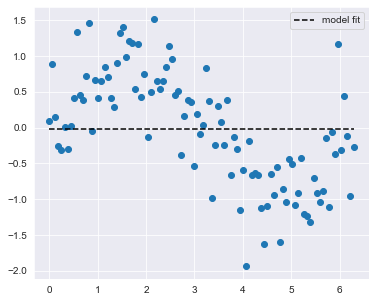

In [66]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, lasso.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [67]:
lasso = Lasso(alpha=2.0, random_state=1234)
lasso.fit(X_sample, y)

Lasso(alpha=2.0, random_state=1234)

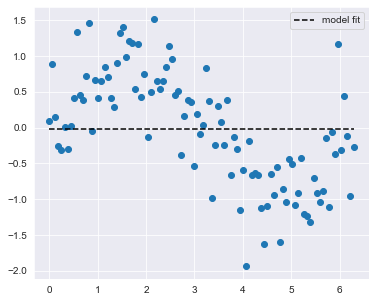

In [68]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, lasso.predict(X_sample), 'k--', label='model fit')

ax.legend(loc=1)
plt.show()

In [69]:
print(lasso.coef_)

[-0.  0. -0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.
  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.
  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.  0.]


In [70]:
lasso = Lasso(alpha=0.01, random_state=1234)
lasso.fit(X_sample, y)

Lasso(alpha=0.01, random_state=1234)

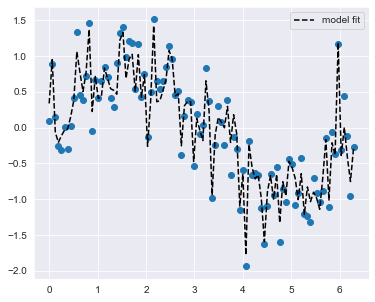

In [71]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, lasso.predict(X_sample), 'k--', label='model fit')

ax.legend(loc=1)
plt.show()

In [72]:
print(lasso.coef_)

[-2.51917168e-01  4.10314859e-02  5.45436757e-03  1.93983589e-02
 -0.00000000e+00  3.71926650e-04 -2.91626816e-02 -7.30117603e-02
 -0.00000000e+00  2.35664422e-02  1.15328229e-02 -1.37269139e-01
 -8.55021573e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.31116907e-02 -7.69147144e-03  1.43637115e-02
 -4.59460085e-02  6.32005952e-02  0.00000000e+00  3.35372015e-02
 -2.04031104e-02 -2.47692101e-02  1.01483461e-02 -1.98289793e-02
  0.00000000e+00 -1.69208119e-02 -6.38448583e-02  4.88311922e-02
 -4.92076031e-02 -5.77076974e-02  1.46127834e-02  6.17103039e-02
  1.08025418e-02 -9.24093430e-03  1.39007203e-02 -3.45517512e-02
  7.75704597e-03  1.34676884e-02 -6.55351081e-02  0.00000000e+00
 -2.51704549e-02  2.19660309e-02 -6.18336806e-02 -0.00000000e+00
 -1.34811001e-03  8.01130519e-03  4.94648308e-02  2.74071927e-02
 -1.71572289e-02 -7.66719433e-02 -1.53841329e-02  4.25935667e-02
  0.00000000e+00  0.00000000e+00 -5.14947316e-02  5.38733880e-02
 -5.87659526e-02 -1.99279

### 4.2 Ridge Regression

In [73]:
from sklearn.linear_model import Ridge

In [74]:
# Default alpha=1.0
ridge = Ridge(alpha=1.0, random_state=1234)
ridge.fit(X_sample, y)

Ridge(random_state=1234)

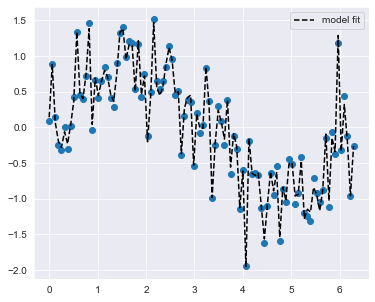

In [75]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, ridge.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [76]:
print( ridge.coef_ )

[-0.29684715  0.07811928 -0.01081815  0.07752363 -0.05209391  0.06597177
 -0.09941976 -0.02095678  0.04224917  0.03330623  0.02933095 -0.22990378
 -0.05383043 -0.09501552 -0.00916561  0.02168726  0.01117362  0.0247942
 -0.04128874 -0.06015788 -0.07177257  0.07528721 -0.05468463  0.08178794
  0.00990867 -0.07854772  0.02718976 -0.02008819  0.06053268 -0.05168845
 -0.11625843  0.14997976 -0.11653335 -0.14694831 -0.00530649  0.05605462
  0.07446295 -0.09937726  0.01051123 -0.1072047   0.01843767 -0.00293992
 -0.12148397 -0.11080856 -0.05319224  0.03874233 -0.05698693 -0.05486004
 -0.06322066  0.02182041  0.06517839  0.04999928 -0.07282591 -0.19374842
  0.01673706  0.0749228   0.02540259  0.02090189 -0.01943677  0.11922506
 -0.14289904 -0.093589   -0.03210794 -0.03192064  0.05836246  0.12613361
 -0.17169424 -0.10278082 -0.1097883   0.05785305  0.08117485  0.09895021
  0.03154747 -0.08589195  0.04408258 -0.11580108 -0.09865743  0.05249017
 -0.09796656 -0.05948369 -0.05389152 -0.11718357 -0.

In [77]:
ridge = Ridge(alpha=0.5, random_state=1234)
ridge.fit(X_sample, y)

Ridge(alpha=0.5, random_state=1234)

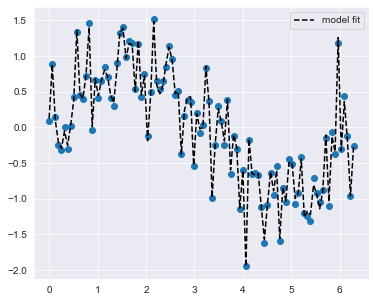

In [78]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, ridge.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [79]:
print( ridge.coef_ )

[-0.30208389  0.0783116  -0.008561    0.08204715 -0.06670881  0.07344217
 -0.11053133 -0.01485217  0.04515549  0.04721998  0.05048001 -0.25218637
 -0.04353109 -0.13977087 -0.01749479  0.01417613  0.01891266 -0.00095329
 -0.05954435 -0.07859067 -0.06973464  0.07329633 -0.06157125  0.10146629
  0.01389787 -0.10182674  0.0189875  -0.02820367  0.08443438 -0.06468595
 -0.10173674  0.17575185 -0.12726992 -0.17792542 -0.02502084  0.06368206
  0.09362423 -0.11517384  0.01386887 -0.13302902  0.00483455 -0.01414969
 -0.11959204 -0.15977016 -0.07539503  0.01780257 -0.02981305 -0.04971948
 -0.08259787  0.02318377  0.04660821  0.04864542 -0.08192852 -0.21225363
  0.0346915   0.07696095  0.01383101  0.01961826 -0.00164144  0.1371216
 -0.16776161 -0.11472388 -0.05048734 -0.02597299  0.06294517  0.1578618
 -0.1916048  -0.14130211 -0.1370536   0.05279126  0.10142856  0.09115189
  0.02825284 -0.11447375  0.06534487 -0.1014944  -0.11054924  0.09896938
 -0.10404176 -0.08390335 -0.04848419 -0.11209537 -0.0

### 4.3 Elastic Net Regression

In [80]:
from sklearn.linear_model import ElasticNet

In [81]:
enet = ElasticNet(alpha=1.0,
                  l1_ratio=0.5,
                  random_state=1234)

enet.fit(X_sample, y)

ElasticNet(random_state=1234)

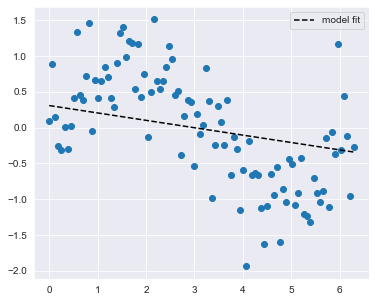

In [82]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, enet.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [83]:
print( enet.coef_ )

[-0.1033666  0.        -0.        -0.         0.         0.
 -0.        -0.        -0.         0.         0.        -0.
 -0.         0.         0.        -0.        -0.         0.
 -0.         0.        -0.         0.         0.         0.
 -0.        -0.        -0.        -0.        -0.        -0.
 -0.        -0.         0.        -0.         0.        -0.
  0.         0.        -0.        -0.        -0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.         0.         0.         0.        -0.
  0.        -0.        -0.         0.        -0.         0.
 -0.         0.        -0.        -0.        -0.         0.
 -0.        -0.         0.         0.         0.         0.
  0.         0.         0.        -0.         0.        -0.
 -0.         0.         0.         0.        -0.        -0.
 -0.         0.        -0.         0.         0.        -0.
  0.         0.        -0.         0.         0.         0.
  0.        -0.        -0.         0.   

In [84]:
enet = ElasticNet(alpha=1.0,
                  l1_ratio=1.0,
                  random_state=1234)

enet.fit(X_sample, y)

ElasticNet(l1_ratio=1.0, random_state=1234)

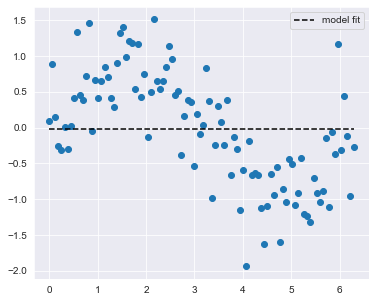

In [85]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, enet.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [86]:
print( enet.coef_ )

[-0.  0. -0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.
  0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.
  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.
 -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.  0.]


In [87]:
enet = ElasticNet(alpha=0.01,
                  l1_ratio=0.5,
                  random_state=1234)

enet.fit(X_sample, y)

ElasticNet(alpha=0.01, random_state=1234)

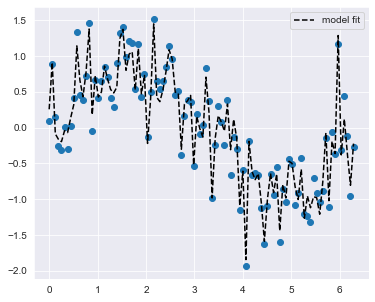

In [88]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, enet.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [89]:
print( enet.coef_ )

[-0.26486045  0.04298242  0.00742904  0.03848651 -0.00369298  0.01630889
 -0.03969584 -0.06838583  0.          0.01223765  0.         -0.16079311
 -0.08590186 -0.          0.          0.00337793  0.          0.05439315
 -0.00560836  0.         -0.05292692  0.06151592 -0.          0.03678179
 -0.01437262 -0.01604844  0.04530877 -0.0125807   0.00112914 -0.02412691
 -0.09274653  0.07007337 -0.06400848 -0.06148557  0.01562378  0.05619311
  0.00425738 -0.03156357  0.01463145 -0.04938065  0.01605828  0.02144099
 -0.09605786  0.         -0.00775791  0.04290143 -0.07727029 -0.02384968
 -0.00279812  0.01140535  0.0814785   0.03202166 -0.04087497 -0.1070377
 -0.02090587  0.0609347   0.00652478  0.         -0.05690183  0.06219168
 -0.08034505 -0.03593893  0.         -0.02842273  0.01739034  0.05569333
 -0.11668482 -0.02039673 -0.02872962  0.06056502  0.05273333  0.09800944
  0.02009541 -0.          0.01641543 -0.08282496 -0.05206842 -0.02491
 -0.06816818 -0.         -0.05921067 -0.07776435 -0.006

In [90]:
enet = ElasticNet(alpha=1.0,
                  l1_ratio=0,
                  random_state=1234)

enet.fit(X_sample, y)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.882786828150797, tolerance: 0.006233383868788853
  model = cd_fast.enet_coordinate_descent(


ElasticNet(l1_ratio=0, random_state=1234)

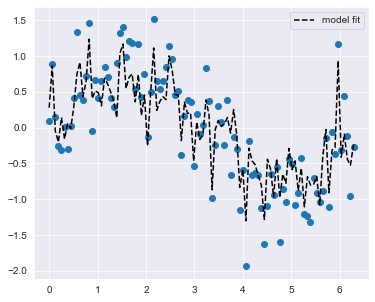

In [91]:
fig = plt.figure(figsize=[6,5])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df_sample.x, df_sample.y)
# Plot predicted values of y
ax.plot(df_sample.x, enet.predict(X_sample), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()

In [92]:
print( enet.coef_ )

[-0.1599266   0.01901336 -0.00363695 -0.00701331 -0.00779949 -0.00975995
 -0.01587245 -0.04868295 -0.01002532  0.02207153  0.01044788 -0.06245985
 -0.05939289  0.01227431 -0.00862264  0.00531654 -0.0201262   0.00629576
 -0.00366068  0.03645775 -0.03281847  0.03151895  0.02204958  0.01871277
 -0.01021932 -0.03683324 -0.00489909 -0.01869302 -0.00999319 -0.02760615
 -0.03203678  0.00263973 -0.01396257 -0.02441583  0.02614446  0.01233672
  0.01448048  0.00963112  0.00520644 -0.02321304 -0.01128931  0.01108419
 -0.01789174  0.03177709 -0.0185849   0.01705269 -0.01919242  0.0113091
  0.0014417  -0.00225509  0.03813596  0.01481051  0.0012886  -0.03626768
 -0.00779874  0.00184868 -0.02142783 -0.0055303  -0.03341371  0.03054187
 -0.04082618 -0.00516867 -0.02344869 -0.01758168  0.01009945  0.01836767
 -0.03814949 -0.01978484  0.0018485   0.04231834  0.04378333  0.05589915
 -0.00504676  0.03452261  0.03459374 -0.01737254 -0.0053648  -0.03800603
 -0.02031135  0.01148725 -0.01919232 -0.01684551 -0.

## 5. Decision Tree Regressor

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
from sklearn.tree import export_graphviz
from graphviz import Source #comment out if you can't install graphviz
from IPython.display import Image

Let's start by creating a noisy sine wave like we did with Regression

In [95]:
x = np.linspace(0, 2*np.pi, 100)

In [96]:
# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

In [97]:
# target variable
y = np.sin(x) + noise

Saving the new values into a dataframe.

In [98]:
# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


In [99]:
# Splits input features from target variable
features = df.drop('y', axis=1)
target = df.y

Now we can create an unconstrained decision tree model.

In [100]:
# Unconstrained Decision Tree
dt_model = DecisionTreeRegressor()

In [101]:
# Fit model
dt_model.fit(features, target)

DecisionTreeRegressor()

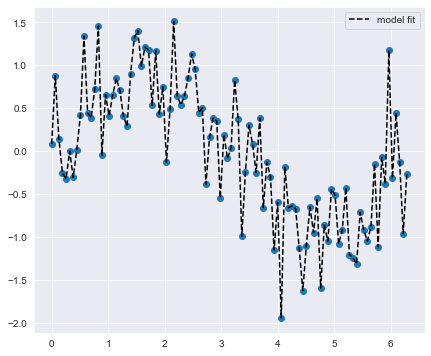

In [102]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, dt_model.predict(features), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()    


In case you had trouble downloading graphviz, you can omit the following steps. 

In [103]:
# Export tree structure and save to Source object 
graph = Source( export_graphviz(dt_model, out_file=None) ) #comment out if you can't install graphviz

In [104]:
tree_png = graph.pipe(format='png') #comment out if you can't install graphviz

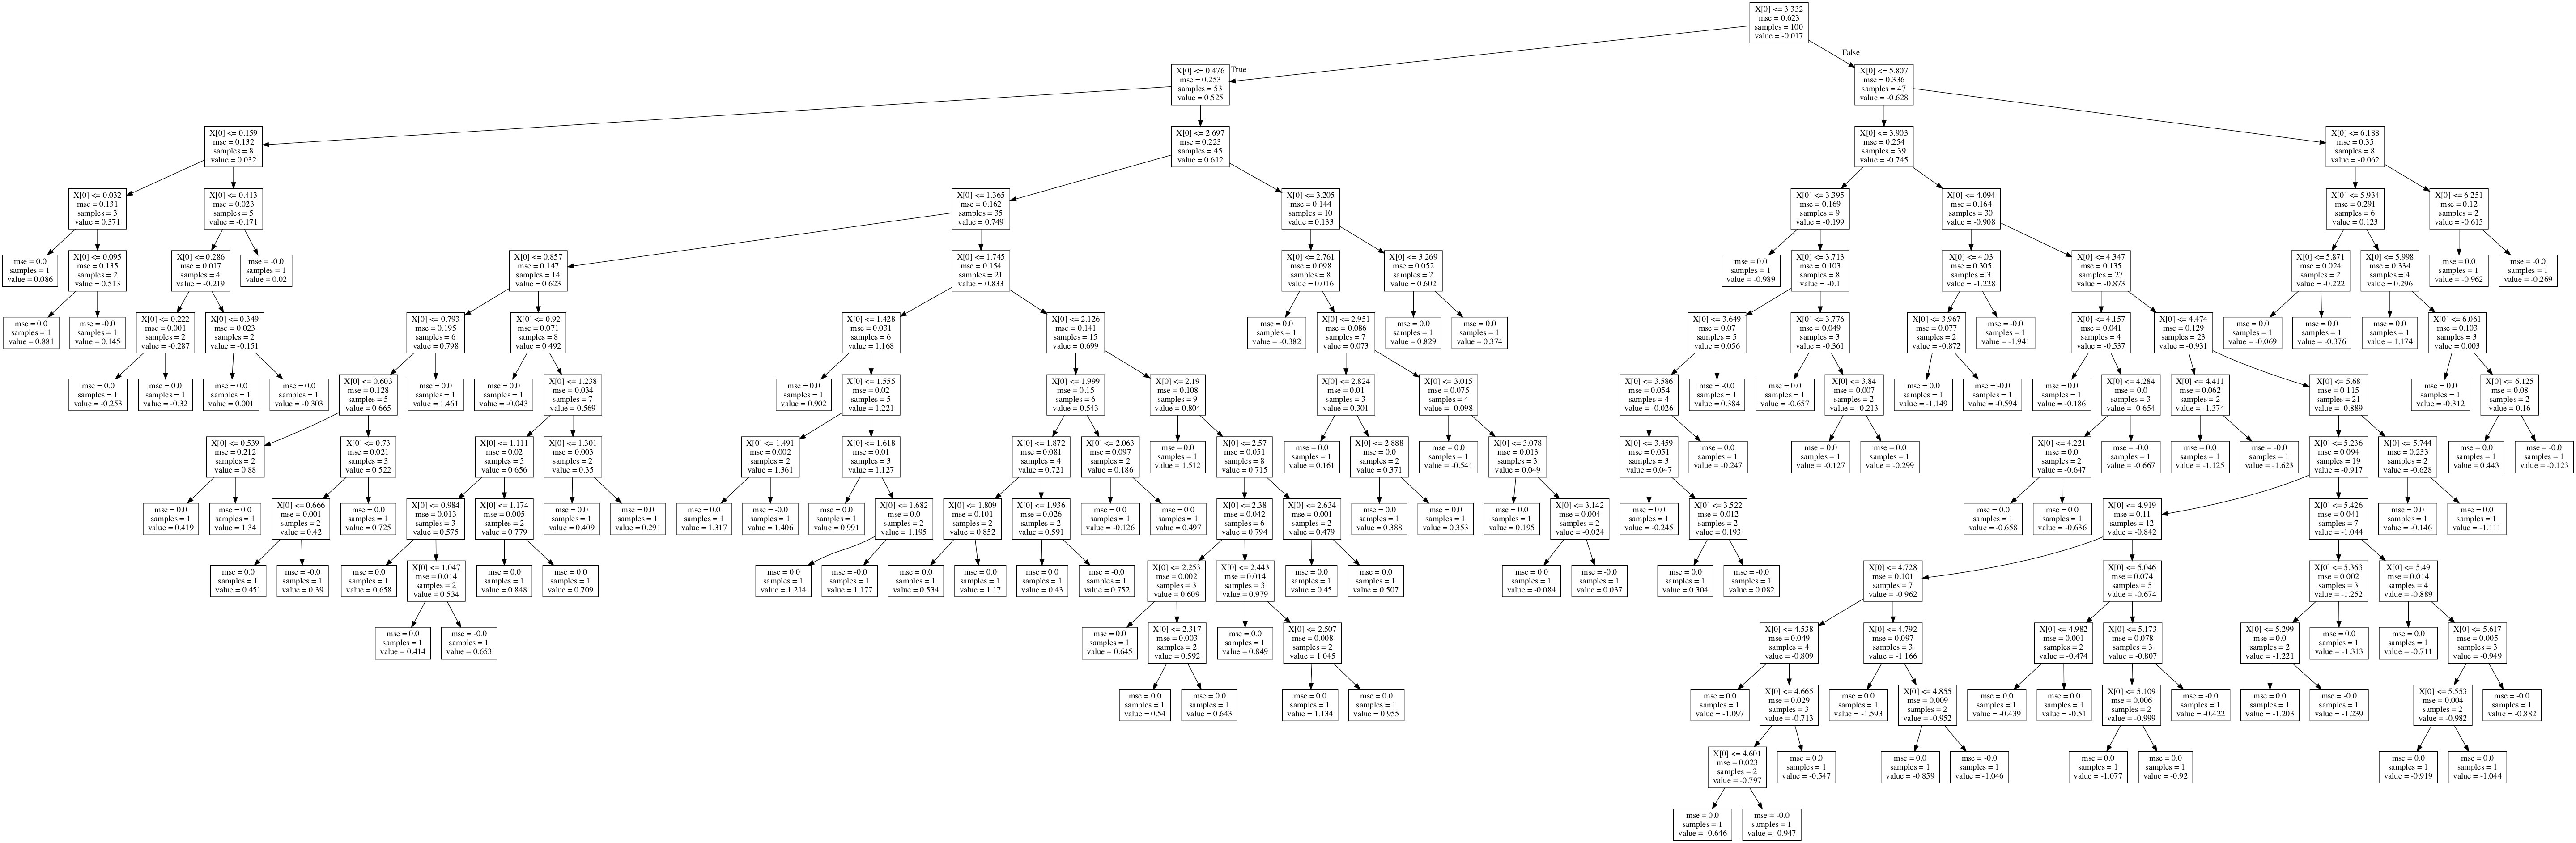

In [105]:
Image(tree_png) #comment out if you can't install graphviz

Let's see if this is a good fit.

In [106]:
dt_model.tree_.node_count

199

In [107]:
from sklearn.metrics import mean_squared_error as mse

In [108]:
print('The mean squared error: ',mse(df.y,dt_model.predict(features)))

The mean squared error:  0.0


In [109]:
dt_model.feature_importances_

array([1.])

## Constrained Decision Trees

### Min samples per leaf
Let's explore how to constrain a decision tree by limiting the amount of samples that we can have in a leaf.

In [110]:
dt_model2 = DecisionTreeRegressor(min_samples_leaf = 10)

In [111]:
# Fit model
dt_model2.fit(features, target)

DecisionTreeRegressor(min_samples_leaf=10)

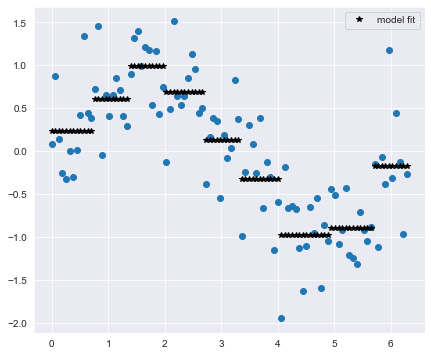

In [112]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, dt_model2.predict(features), 'k*', label='model fit')
ax.legend(loc=1)
plt.show()    

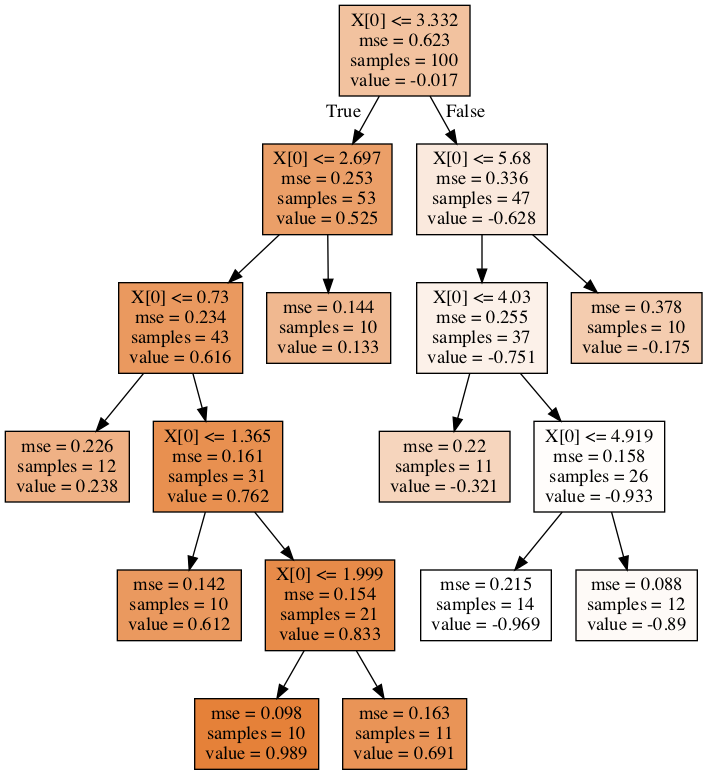

In [113]:
# Export tree structure and save to Source object`
graph = Source( export_graphviz(dt_model2, filled=True, out_file=None) ) #comment out if you can't install graphviz

tree_png = graph.pipe(format='png') #comment out if you can't install graphviz
Image(tree_png) #comment out if you can't install graphviz

Is this a good fit?

In [114]:
dt_model2.tree_.children_left

array([ 1,  2,  3, -1,  5, -1,  7, -1, -1, -1, 11, 12, -1, 14, -1, -1, -1])

In [115]:
print('The mean squared error: ',mse(df.y,dt_model2.predict(features)))

The mean squared error:  0.18609158651134527


### Maximum depth
Here is another way to constrain a decision tree.

In [116]:
dt_model3 = DecisionTreeRegressor(max_depth=4)

In [117]:
# Fit model
dt_model3.fit(features, target)

DecisionTreeRegressor(max_depth=4)

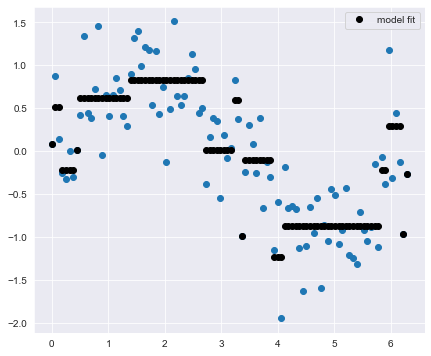

In [118]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, dt_model3.predict(features), 'ko', label='model fit')
ax.legend(loc=1)
plt.show()    


In [119]:
# Export tree structure and save to Source object`
graph = Source( export_graphviz(dt_model3, out_file=None) )

In [120]:
tree_png = graph.pipe(format='png')

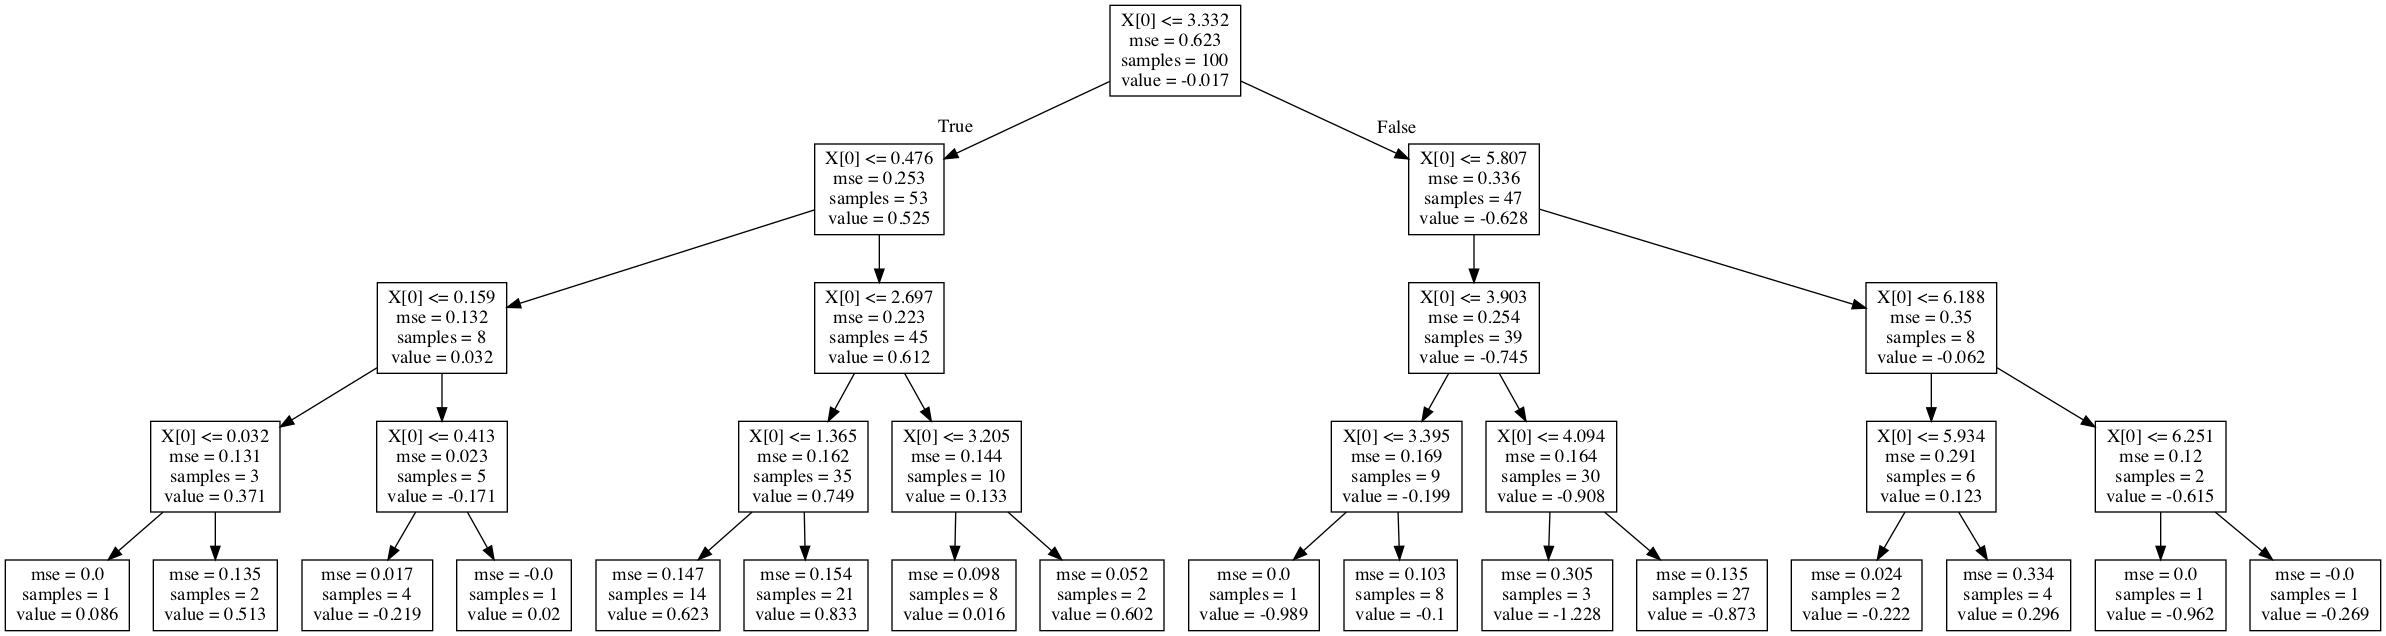

In [121]:
Image(tree_png)

How about this fit?

In [122]:
print('The mean squared error: ',mse(df.y,dt_model3.predict(features)))

The mean squared error:  0.13297571554901563


What can we say about depth vs samples for this example?

In [123]:
print('Model 1 has: ', dt_model.tree_.node_count, 'nodes.')
print('Model 2 has: ', dt_model2.tree_.node_count, 'nodes.')
print('Model 3 has: ', dt_model3.tree_.node_count, 'nodes.')

Model 1 has:  199 nodes.
Model 2 has:  17 nodes.
Model 3 has:  31 nodes.


In [124]:
print('Model 1 mse is: ', mse(df.y,dt_model.predict(features)))
print('Model 2 mse is: ', mse(df.y,dt_model2.predict(features)))
print('Model 3 mse is: ', mse(df.y,dt_model3.predict(features)))

Model 1 mse is:  0.0
Model 2 mse is:  0.18609158651134527
Model 3 mse is:  0.13297571554901563


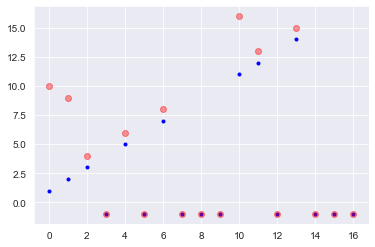

In [125]:
plt.figure()
plt.plot(dt_model2.tree_.children_left, 'b.', label='left')
plt.plot(dt_model2.tree_.children_right, 'ro', alpha=0.4, label='right')

## 6. Random Forest Regressor
Random forests are ensemble models of decision trees. Let's start by importing our library.

In [126]:
from sklearn.ensemble import RandomForestRegressor

Random forests need randomness, let's set the random_state to 123.

In [127]:
rf =  RandomForestRegressor(random_state=123)

In [128]:
# Fit the model.
rf.fit(features, target)

RandomForestRegressor(random_state=123)

In [129]:
# Number of decision trees in the random forest
print(len(rf.estimators_))

# Display first decision tree
print(rf.estimators_[60])

100
DecisionTreeRegressor(max_features='auto', random_state=395587690)


Let's plot the results.

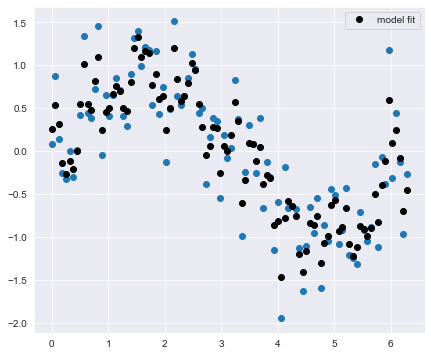

In [130]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
ax.scatter(df.x, df.y)
ax.plot(df.x, rf.predict(features), 'ko', label='model fit')
ax.legend(loc=1)
plt.show()    

In [131]:
graph1 = Source( export_graphviz(rf.estimators_[0], out_file=None) )

In [132]:
tree_png1 = graph1.pipe(format='png')

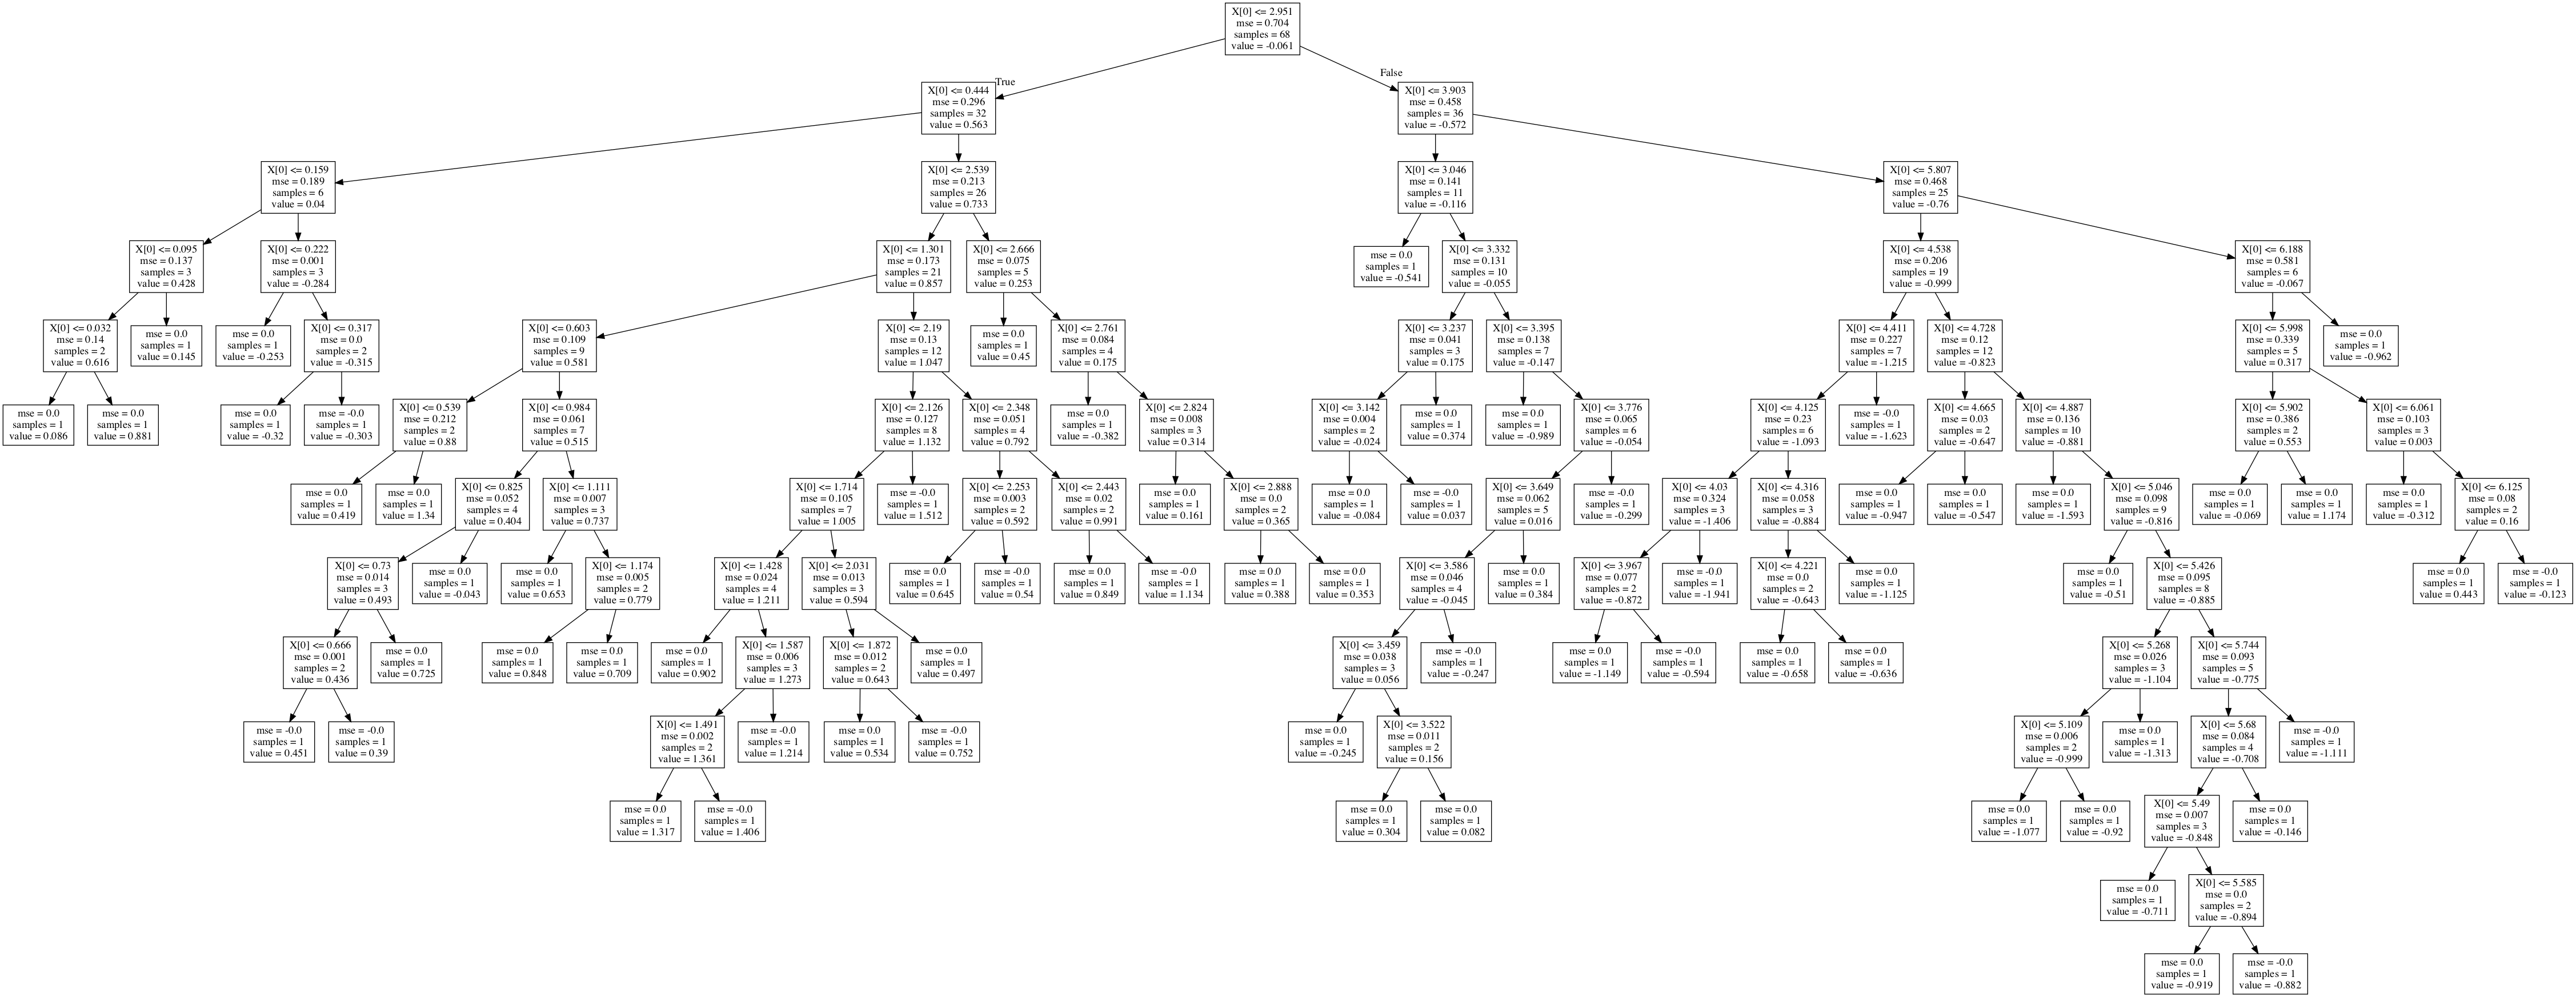

In [133]:
Image(tree_png1)

In [134]:
graph2 = Source( export_graphviz(rf.estimators_[70], out_file=None) )

In [135]:
tree_png2 = graph2.pipe(format='png')

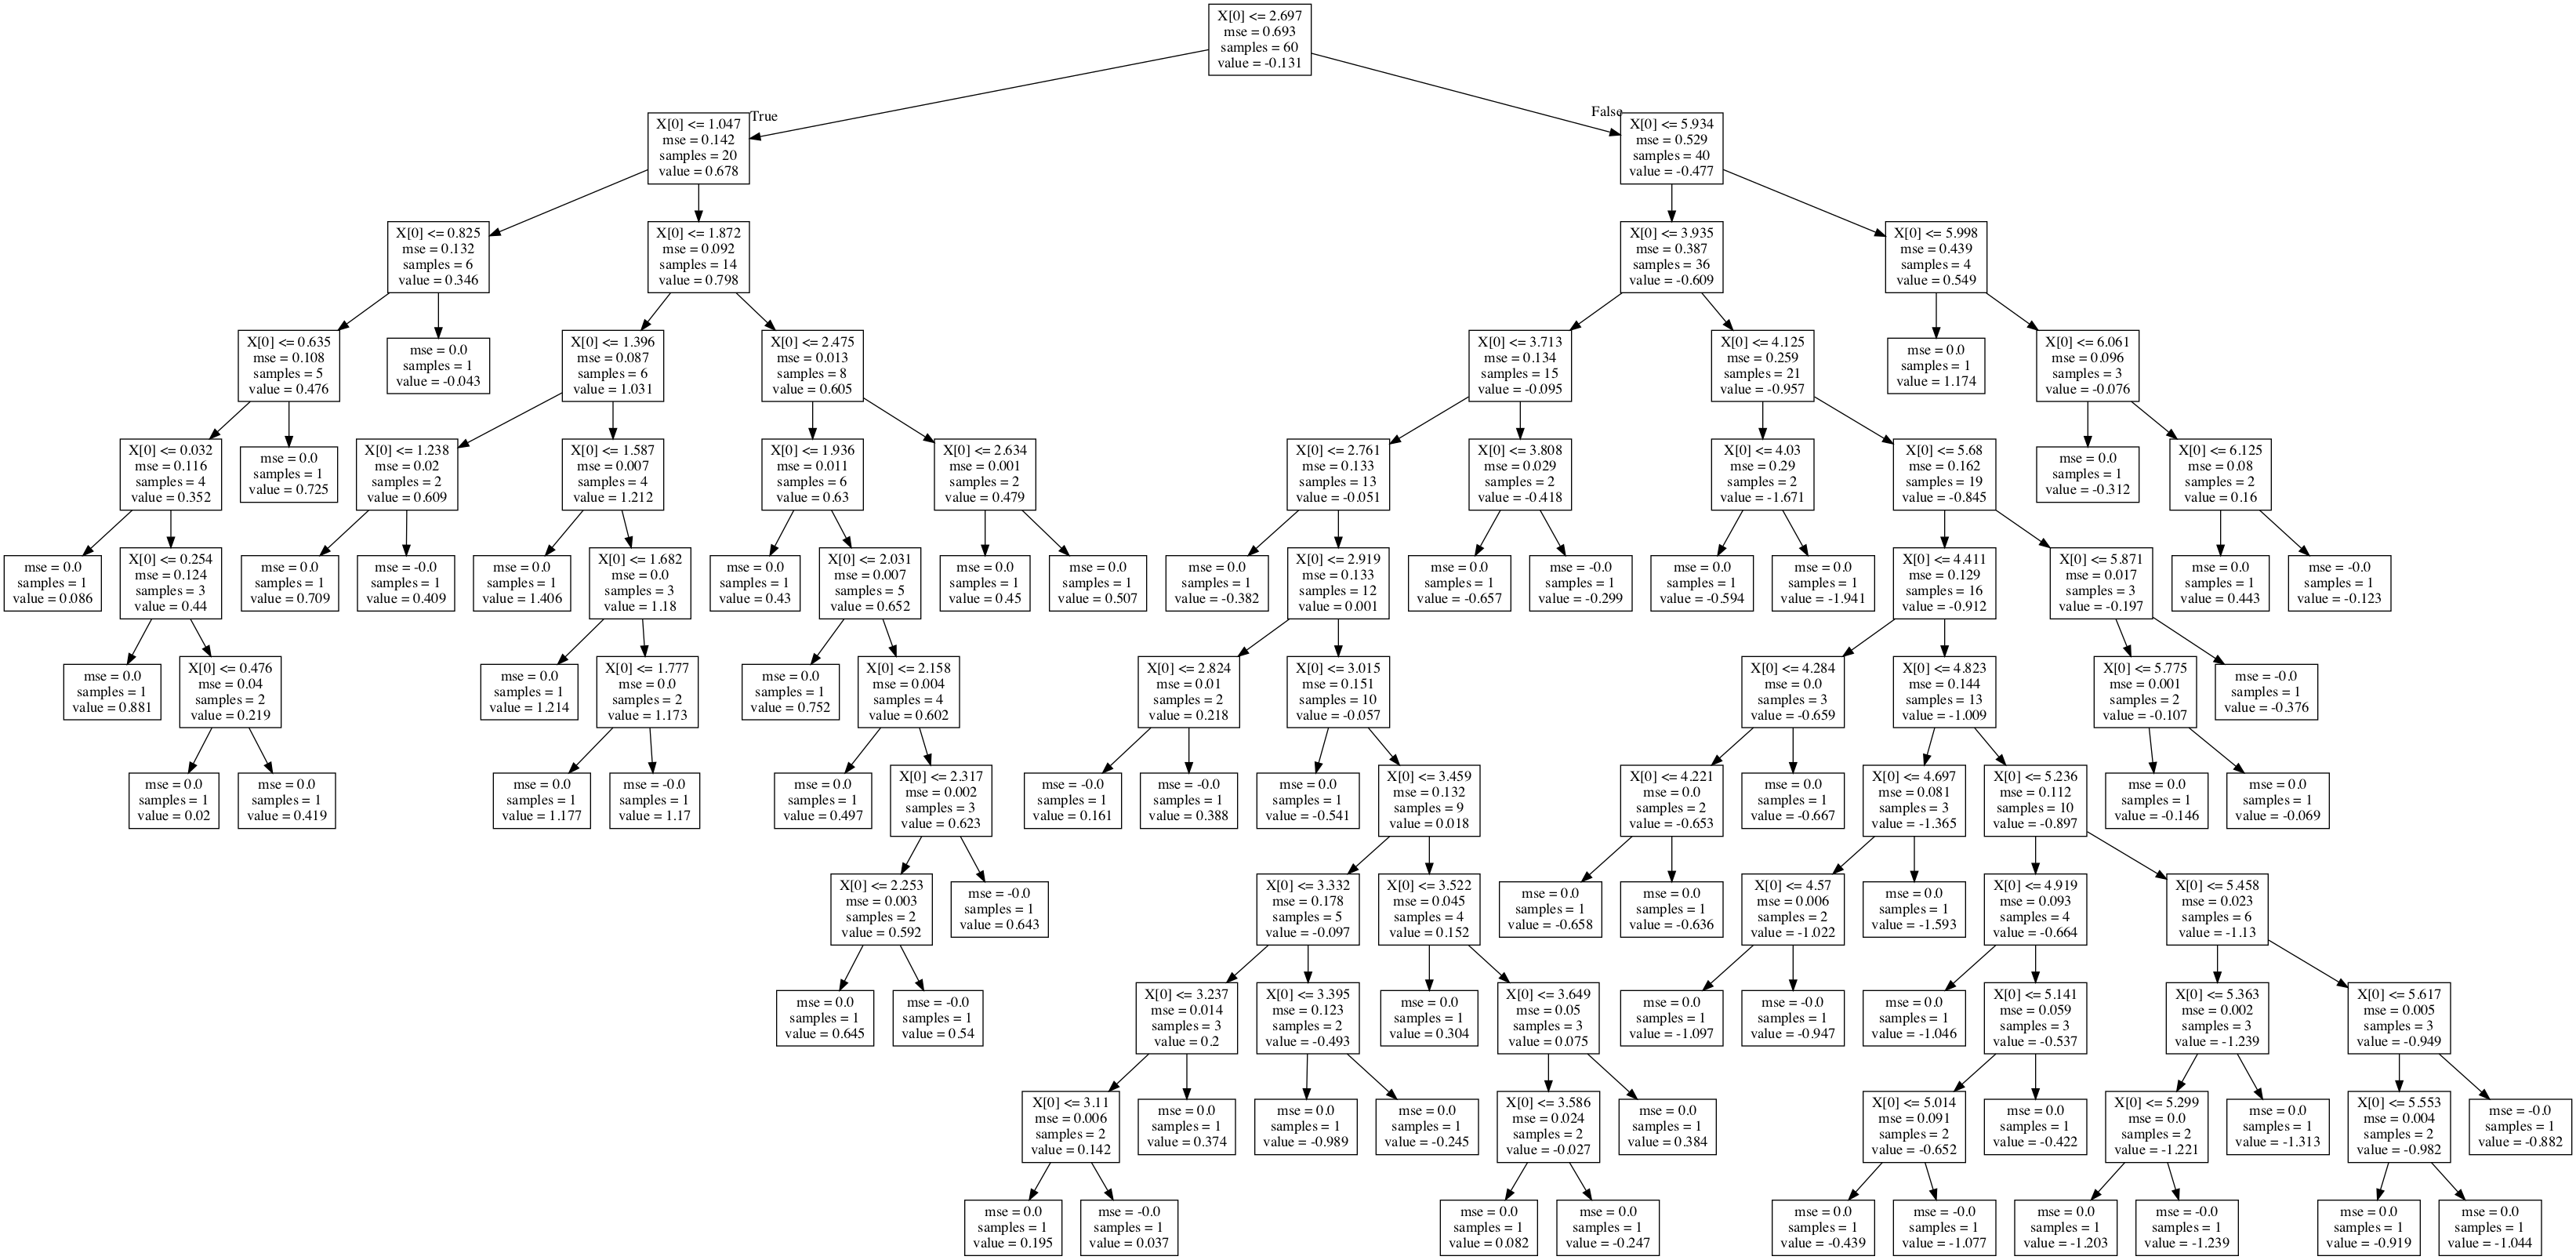

In [136]:
Image(tree_png2)

In [137]:
print('The mean squared error: ',mse(df.y,dt_model2.predict(features)))

The mean squared error:  0.18609158651134527


In [138]:
rf_2 =  RandomForestRegressor(n_estimators=5, min_samples_leaf=3, random_state=123)
# Fit the model.
rf_2.fit(features, target)

# Number of decision trees in the random forest
print(len(rf_2.estimators_))


5


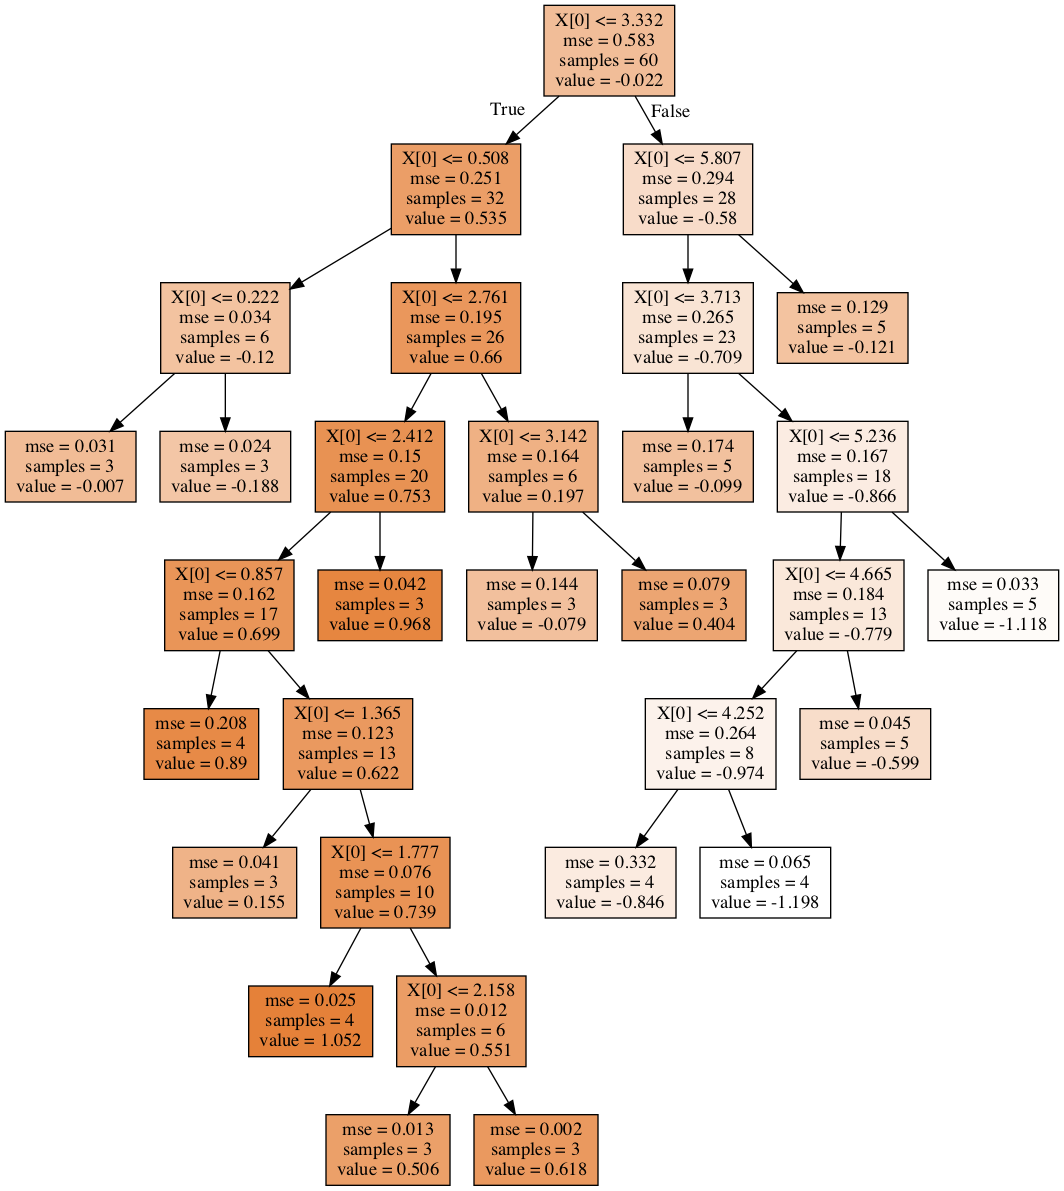

In [139]:
# Export tree structure and save to Source object`
graph = Source( export_graphviz(rf_2.estimators_[1], filled=True, out_file=None) ) #comment out if you can't install graphviz

tree_png = graph.pipe(format='png') #comment out if you can't install graphviz
Image(tree_png) #comment out if you can't install graphviz

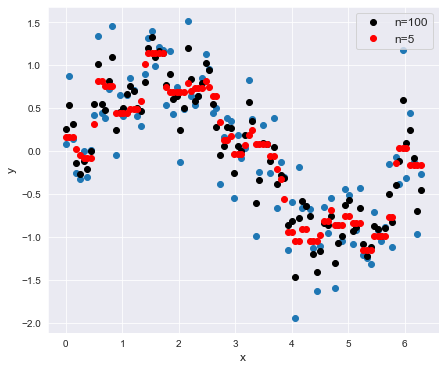

In [140]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
ax.scatter(df.x, df.y)
ax.plot(df.x, rf.predict(features), 'ko', label='n=100')
ax.plot(df.x, rf_2.predict(features), 'ro', label='n=5')
ax.legend(loc=1, fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
plt.show() 


### Example with a more complex data set

In [145]:
from sklearn.datasets import load_iris
iris_df = pd.read_csv('./iris.csv')

In [146]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


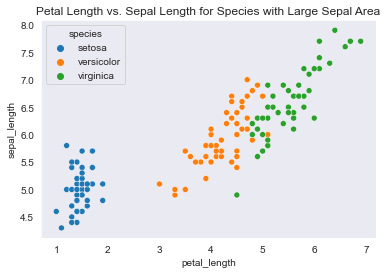

In [147]:
fig, ax = plt.subplots(figsize=[6,4])
sns.scatterplot(ax=ax, x='petal_length', y='sepal_length', data=iris_df, hue='species')
plt.grid()
plt.title('Petal Length vs. Sepal Length for Species with Large Sepal Area')
plt.show()

In [148]:
versicolor_df = iris_df[iris_df.species=='versicolor']

In [149]:
versicolor_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [150]:
versicolor_df = versicolor_df.reset_index(drop=True)

In [151]:
versicolor_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


In [152]:
y = versicolor_df['petal_length']
X = versicolor_df['sepal_length']

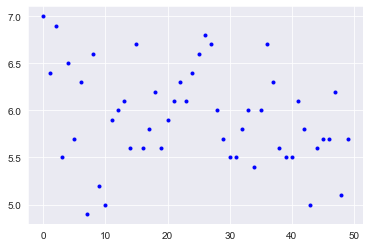

In [153]:
fig, ax = plt.subplots()
ax.plot(X, 'b.')

In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X.values.reshape(-1,1))

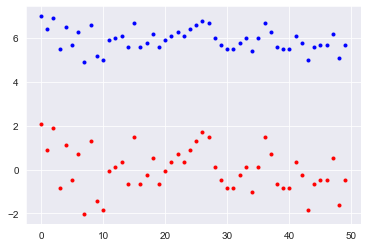

In [155]:
fig, ax = plt.subplots()
ax.plot(X, 'b.', label='X')
ax.plot(X_scaled, 'r.', label='X_scaled')


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X_scaled, y, test_size=0.20, random_state=123)

In [157]:
dt_estimate = DecisionTreeRegressor(criterion='mae', max_depth=4)
dt_estimate.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4)

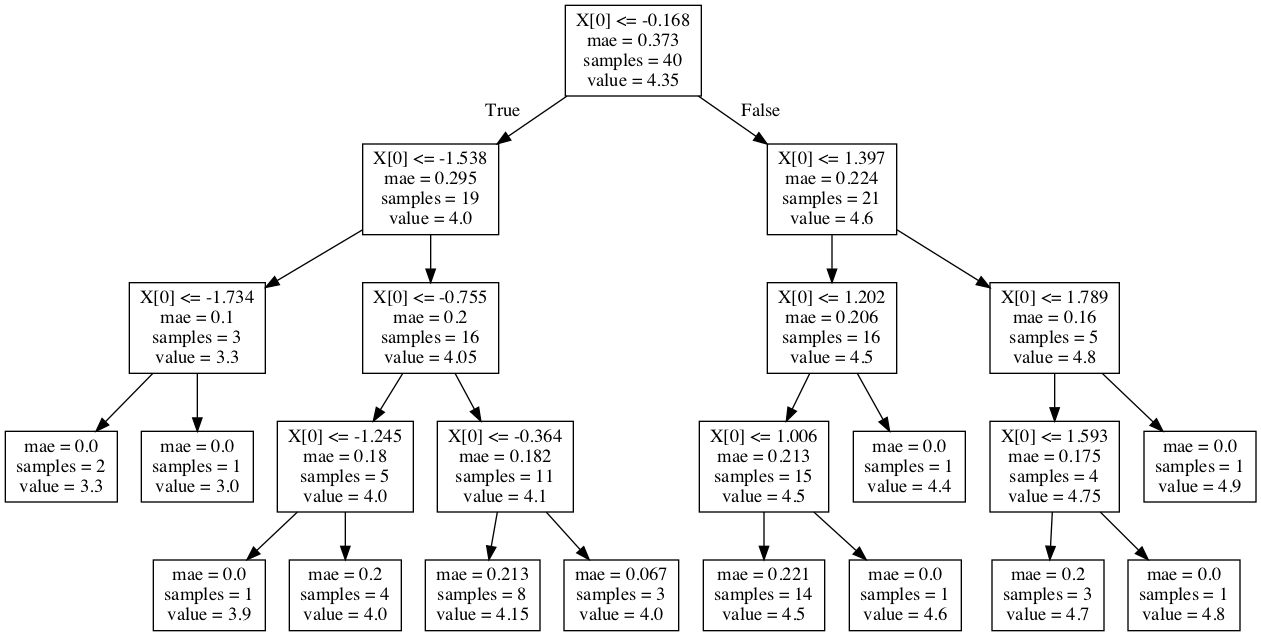

In [158]:
# Export tree structure and save to Source object`
graph = Source( export_graphviz(dt_estimate, out_file=None))
tree_png = graph.pipe(format='png')
Image(tree_png)


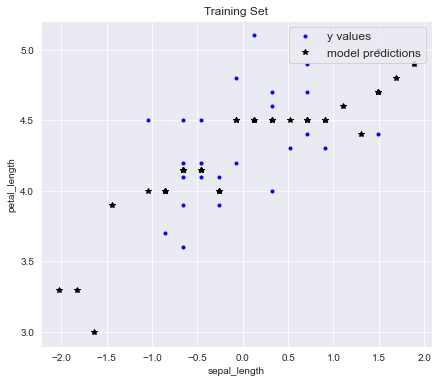

In [159]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.plot(X_train, y_train, 'b.', label='y values')
# Plot predicted values of y
ax.plot(X_train, dt_estimate.predict(X_train), 'k*', label='model predictions')
ax.legend(loc=1, fontsize=12)
ax.set_ylabel('petal_length')
ax.set_xlabel('sepal_length')
ax.set_title('Training Set')
plt.show()   

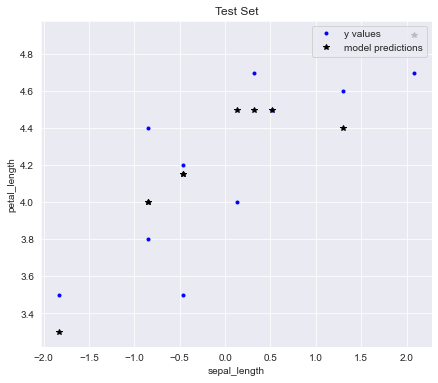

In [160]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.plot(X_test, y_test, 'b.', label='y values')
# Plot predicted values of y
ax.plot(X_test, dt_estimate.predict(X_test), 'k*', label='model predictions')
ax.legend(loc=1)
ax.set_ylabel('petal_length')
ax.set_xlabel('sepal_length')
ax.set_title('Test Set')
plt.show() 

In [161]:
len(y_test), len(dt_estimate.predict(X_test))

(10, 10)

What is wrong in these plots?

In [162]:
X_plot_train = scaler.inverse_transform(X_train)
X_plot_test = scaler.inverse_transform(X_test)

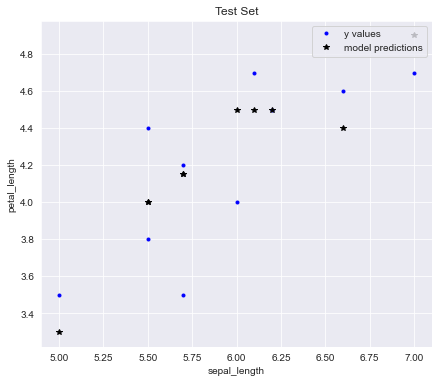

In [163]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.plot(X_plot_test, y_test, 'b.', label='y values')
# Plot predicted values of y
ax.plot(X_plot_test, dt_estimate.predict(X_test), 'k*', label='model predictions')
ax.legend(loc=1)
ax.set_ylabel('petal_length')
ax.set_xlabel('sepal_length')
ax.set_title('Test Set')
plt.show() 